In [39]:
import pm4py
import os
from Julia import *
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"



In [40]:
def import_xes(file_path):
    data = pm4py.read_xes(file_path)
    print(data.head())
    # with open(file_path, 'r') as f:
    #     data = f.read()
    #     data = BeautifulSoup(data, "xml")
    return data

data = import_xes("Hospital Billing - Event Log.xes")

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\conversion\log\variants\to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\datafr

  isCancelled diagnosis            time:timestamp caseType speciality  \
0       False         A 2012-12-16 18:33:10+00:00        A          A   
1         NaN       NaN 2013-12-15 18:00:37+00:00      NaN        NaN   
2         NaN       NaN 2013-12-16 02:53:38+00:00      NaN        NaN   
3         NaN       NaN 2013-12-17 11:56:29+00:00      NaN        NaN   
4         NaN       NaN 2013-12-19 02:44:31+00:00      NaN        NaN   

  org:resource concept:name blocked isClosed flagD  ... lifecycle:transition  \
0         ResA          NEW   False     True  True  ...             complete   
1          NaN          FIN     NaN      NaN   NaN  ...             complete   
2          NaN      RELEASE     NaN      NaN   NaN  ...             complete   
3          NaN      CODE OK     NaN      NaN   NaN  ...             complete   
4         ResB       BILLED     NaN      NaN   NaN  ...             complete   

  case:concept:name closeCode actRed actOrange  flagC msgCount version  \
0     

D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\JetBrains\Projects\StudioProject\.venv\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col],

In [41]:
process_tree = pm4py.discover_process_tree_inductive(
    data,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

In [42]:
pm4py.save_vis_process_tree(process_tree, 'process_tree.png')

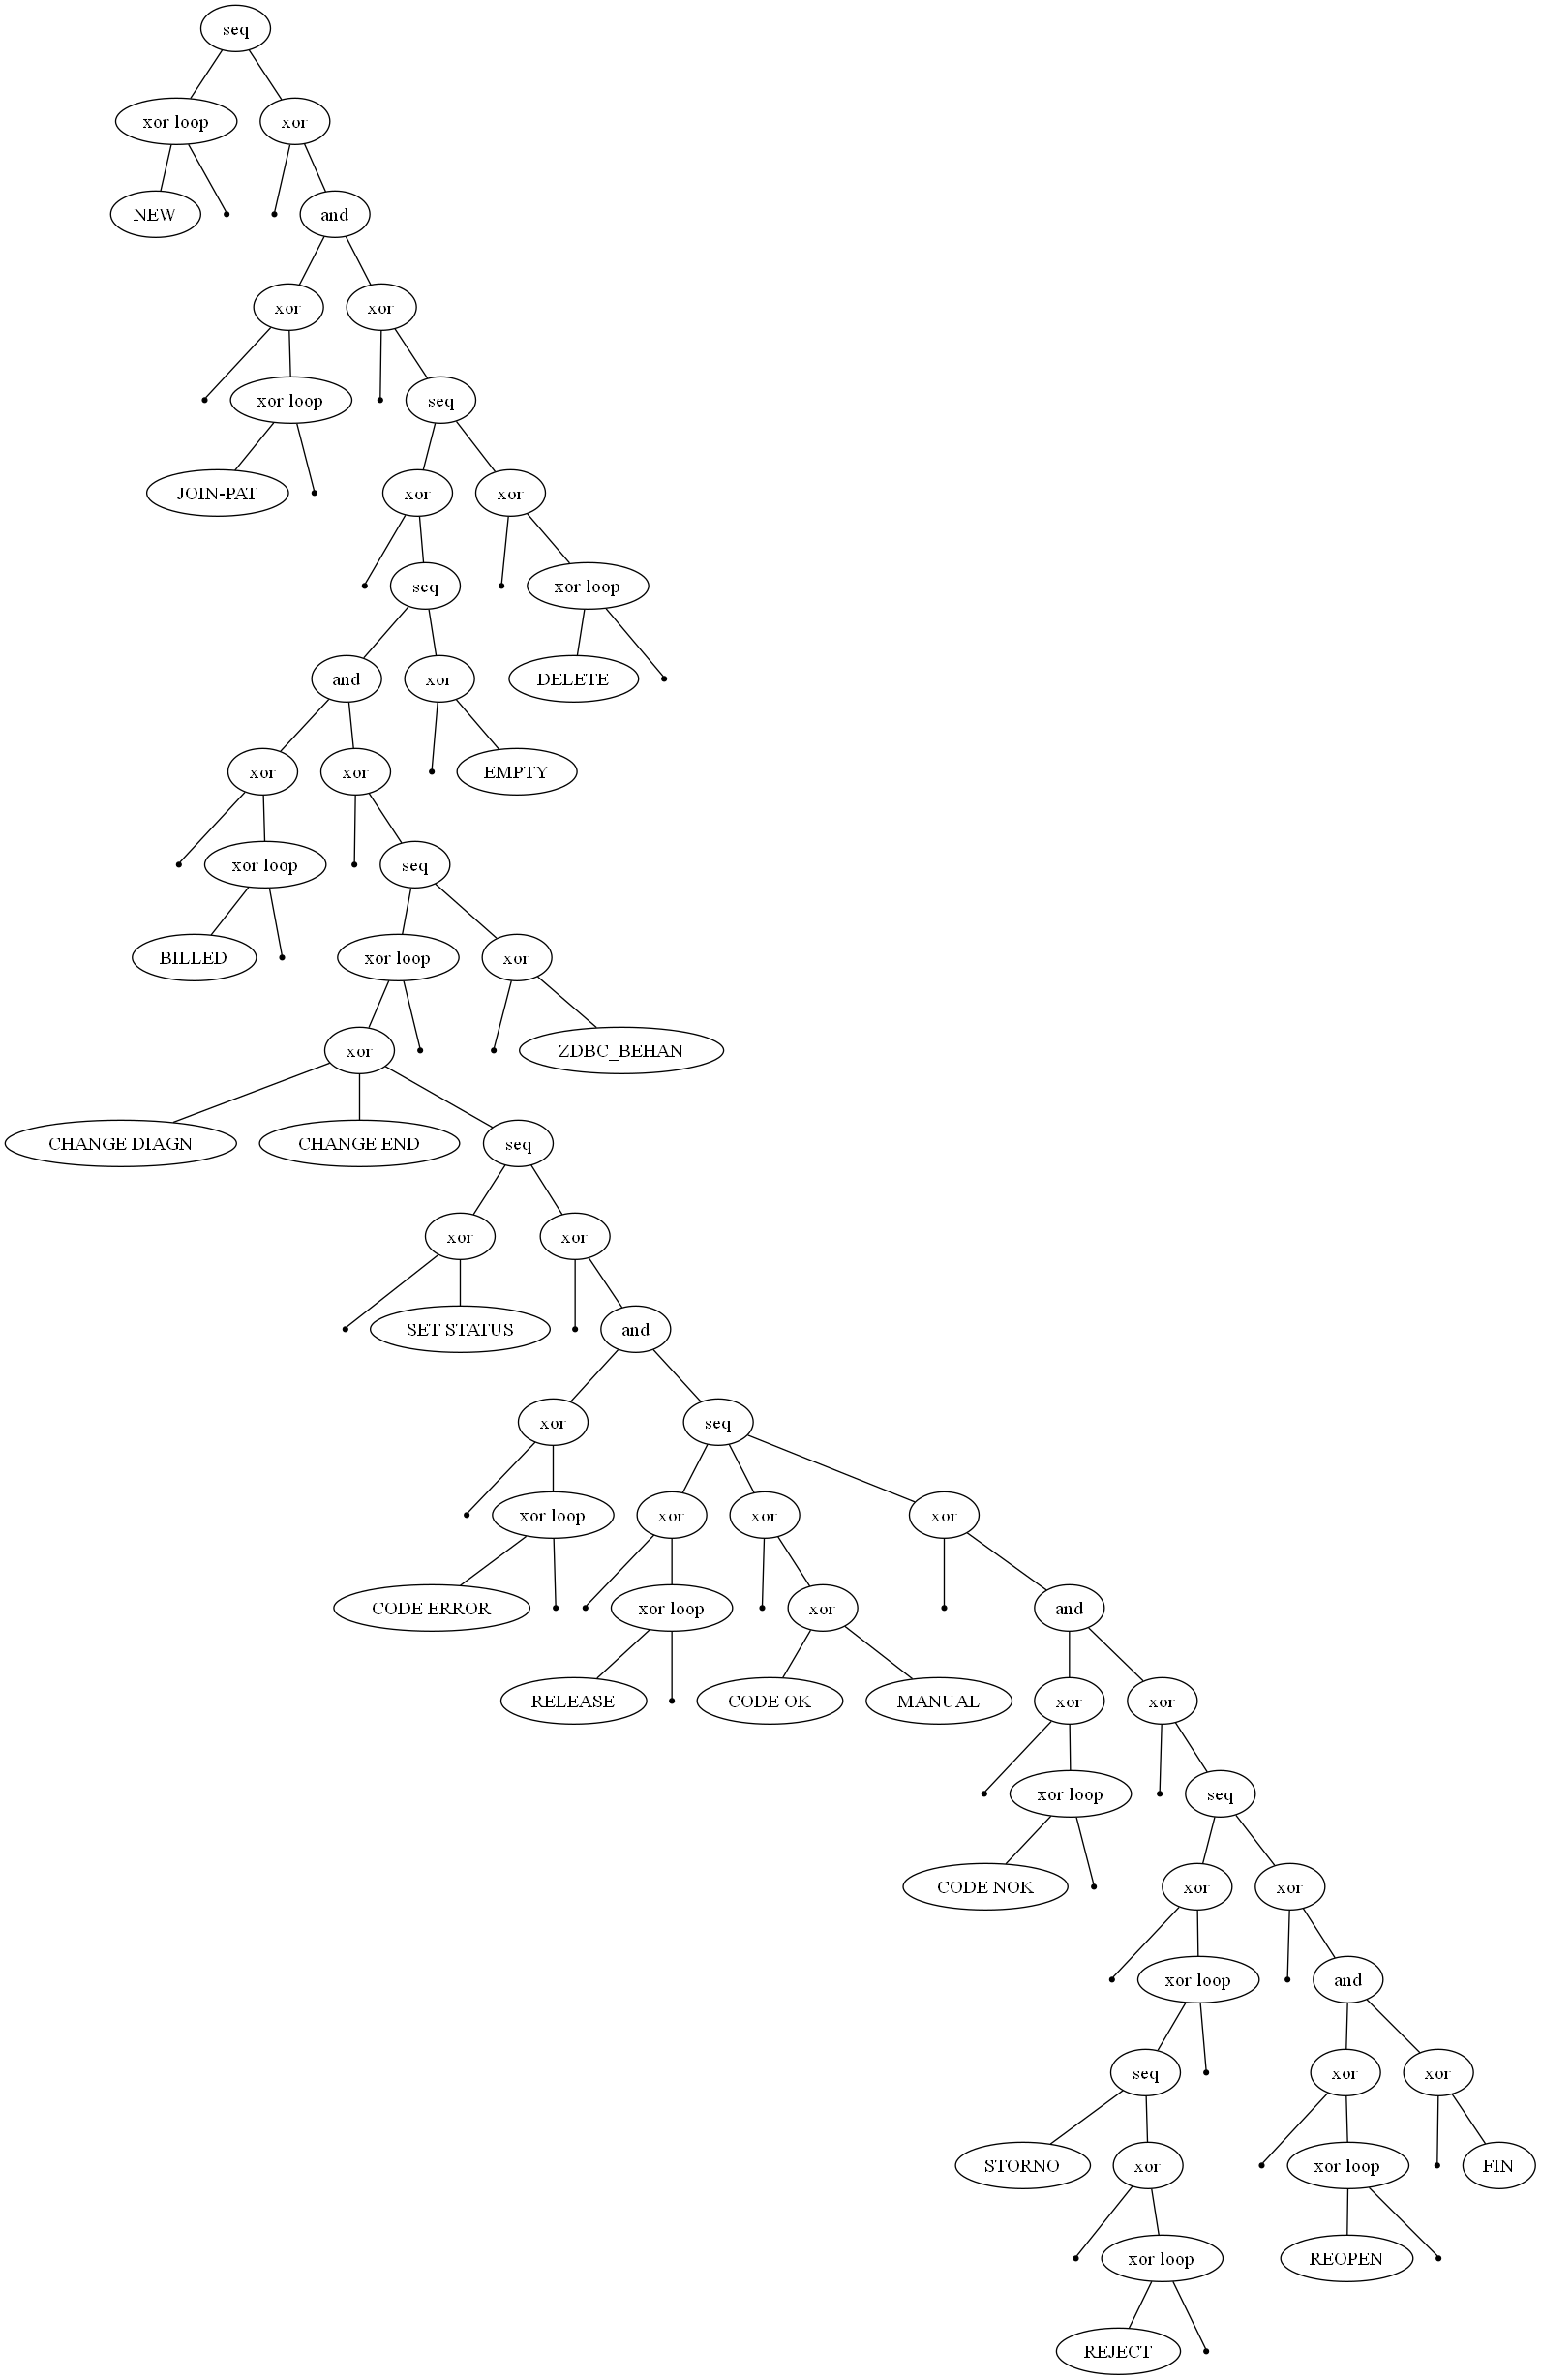

In [43]:
pm4py.view_process_tree(process_tree)

In [44]:
W1 = str(process_tree)
W1 = ProcessTreeAdapter.remove_brackets_between_single_quotes(W1)
W1 = ProcessTreeAdapter.replace_spaces_with_underscore(W1)
W1 = W1.replace("( ", "(").replace(") ", ")").replace(" )", ")").replace("->", ">")

In [45]:
labelled_pattern_expression1 = ProcessTreeAdapter.label_expressions(W1)
labelled_pattern_expression1

'>(1]*(2]NEW, tau[2), X(2]tau, +(3]X(4]tau, *(5]JOIN-PAT, tau[5)[4), X(4]tau, >(5]X(6]tau, >(7]+(8]X(9]tau, *(10]BILLED, tau[10)[9), X(9]tau, >(10]*(11]X(12]>(13]X(14]tau, SET_STATUS[14), X(14]tau, +(15]X(16]tau, *(17]CODE_ERROR, tau[17)[16), >(16]X(17]tau, *(18]RELEASE, tau[18)[17), X(17]tau, X(18]MANUAL, CODE_OK[18)[17), X(17]tau, +(18]X(19]tau, *(20]CODE_NOK, tau[20)[19), X(19]tau, >(20]X(21]tau, *(22]>(23]STORNO, X(24]tau, *(25]REJECT, tau[25)[24)[23), tau[22)[21), X(21]tau, +(22]X(23]tau, *(24]REOPEN, tau[24)[23), X(23]tau, FIN[23)[22)[21)[20)[19)[18)[17)[16)[15)[14)[13), CHANGE_DIAGN, CHANGE_END[12), tau[11), X(11]tau, ZDBC_BEHAN[11)[10)[9)[8), X(8]tau, EMPTY[8)[7)[6), X(6]tau, *(7]DELETE, tau[7)[6)[5)[4)[3)[2)[1)'

In [46]:
pattern_expression1 = get_pattern_expression(labelled_pattern_expression1)

ValueError: invalid literal for int() with base 10: ')'

In [ ]:
print(pattern_expression1)

In [ ]:
pattern_rules= "approved_patterns.json"
ltl_pattern_property_set = WorkflowPatternTemplate.load_pattern_property_set(pattern_rules)

In [ ]:
get_results(pattern_expression1)